In [1]:
pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 154.6MB 36kB/s 
     |████████████████████████████████| 5.1MB 2.0MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [3]:
import pandas as pd
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X= df.drop("Outcome",axis=1).values
y= df["Outcome"].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [17]:
class ANN_Model(nn.Module):
  def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features= 2):
    super().__init__()
    self.f_connected1=nn.Linear(input_features,hidden1)
    self.f_connected2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2, out_features)
  def forward(self, x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)
    return x

In [18]:
torch.manual_seed(20)
model=ANN_Model()

In [19]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [20]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [21]:
epochs=500
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model.forward(X_train)
  loss=loss_function(y_pred,y_train)
  final_losses.append(loss)
  if i%10==1:
    print("Epoch number: {} and the loss: {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss: 3.45721173286438
Epoch number: 11 and the loss: 0.8019213080406189
Epoch number: 21 and the loss: 0.6090323328971863
Epoch number: 31 and the loss: 0.591776967048645
Epoch number: 41 and the loss: 0.5679706335067749
Epoch number: 51 and the loss: 0.552903950214386
Epoch number: 61 and the loss: 0.5410096049308777
Epoch number: 71 and the loss: 0.5310391783714294
Epoch number: 81 and the loss: 0.5220361351966858
Epoch number: 91 and the loss: 0.5135970115661621
Epoch number: 101 and the loss: 0.5061253309249878
Epoch number: 111 and the loss: 0.4983411729335785
Epoch number: 121 and the loss: 0.49605482816696167
Epoch number: 131 and the loss: 0.48286372423171997
Epoch number: 141 and the loss: 0.4756038188934326
Epoch number: 151 and the loss: 0.479922354221344
Epoch number: 161 and the loss: 0.4793105721473694
Epoch number: 171 and the loss: 0.46500328183174133
Epoch number: 181 and the loss: 0.4582153260707855
Epoch number: 191 and the loss: 0.4527052640

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

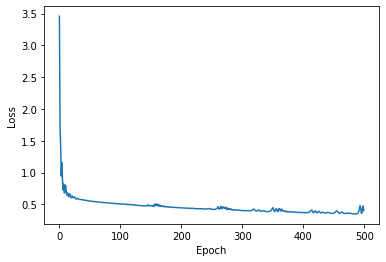

In [23]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [26]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        #print(y_pred.argmax().item())

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[83, 24],
       [13, 34]])

Text(69.0, 0.5, 'Predicted Values')

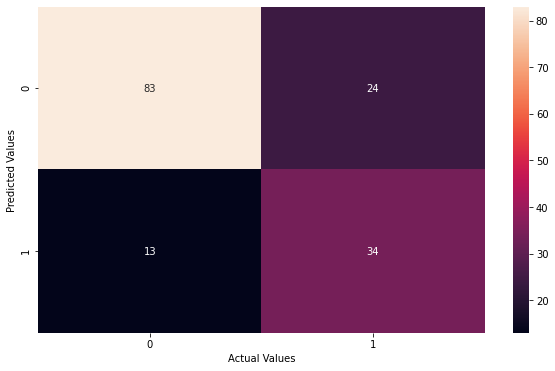

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [30]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7597402597402597

In [31]:
#### Save the model
torch.save(model,'diabetes.pt')

In [32]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [33]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [34]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [35]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [36]:
new_data=torch.tensor(lst1)

In [37]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([0.9544, 1.4786])
1
